How to combine these three seperate plots into a single figure (in a way that I can also add 2 more in the future)?
All the matplot lib documentation/CLEX training on subplots deals with basic subplots, not ones with heavily altered color bars like these ones. I can't find any way to combine these while still maintaining the colourbars. 
See bottom for attempts, the final attempt is as close as i can get but there are still some issues

In [32]:
import xarray 
import numpy as np
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.colors as mcolors
from matplotlib import cm
from random import random
from matplotlib.colors import ListedColormap
from matplotlib.animation import FuncAnimation
from IPython.display import HTML, display
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from mpl_toolkits.axes_grid1 import make_axes_locatable
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
ds = xarray.open_mfdataset('/g/data/e14/jt8205/mhw_data_90pc/mhw_severity.pc90.210to240*.nc', parallel=True)

In [8]:
sev=ds.severity
sev_gt1=ds.severity.where(ds.severity >=1)
sev_gt2=ds.severity.where(ds.severity >=2)

In [13]:
#Creating Plot 1
sev_core48=ds.severity.sel(time=slice('2015-01-01','2015-03-15')).sel(lon=slice(210,290), lat = slice(-70, -20))
max_sev_core48=sev_core48.max(dim='time')

/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/dask/utils.py:29: RuntimeWarning: All-NaN slice encountered
  return func(*args, **kwargs)
/g/data3/hh5/public/apps/miniconda3/envs/analysis3-20.10/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: All-NaN slice encountered
  return func(*(_execute_task(a, cache) for a in args))


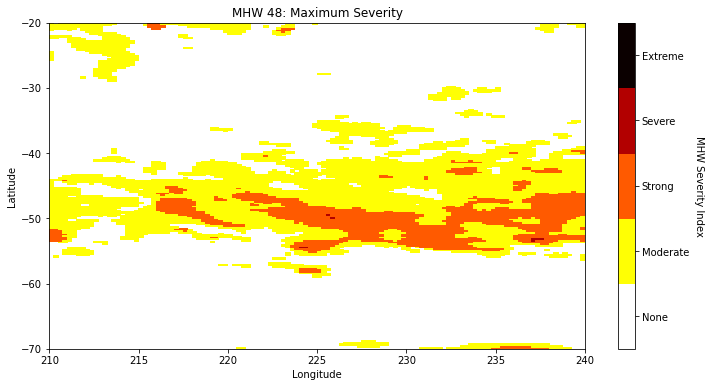

In [14]:
#Plot 1
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()

#Plot the map

cax_maxsev = max_sev_core48.plot( 
    add_colorbar=False,
    vmin=0, vmax=5,
    cmap=cm.get_cmap('hot_r', 5)
    
)   

#Colorbar ticks
cbar = fig.colorbar(cax_maxsev, ticks=[0.5, 1.5, 2.5, 3.5, 4.5], extend='neither')
cbar.ax.set_yticklabels(['None', 'Moderate', 'Strong', 'Severe', 'Extreme'])


#Labels
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('MHW Severity Index', rotation=270)
plt.title("MHW 48: Maximum Severity")
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

In [9]:
#Creating Plot 2
gt1_sev_core48=sev_gt1.sel(time=slice('2015-01-01','2015-03-15')).sel(lon=slice(210,290), lat = slice(-70, -20))
count_gt1_sev_core48 = gt1_sev_core48.count('time')

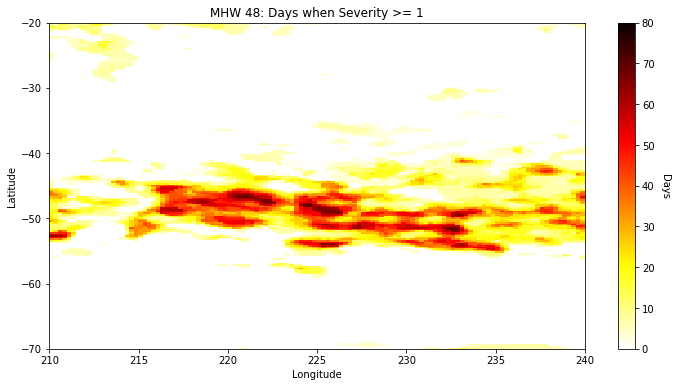

In [10]:
#Plot 2
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()

#Plot the map

cax_gt1=count_gt1_sev_core48.plot(
    add_colorbar=False,
    vmin=0, vmax = 80,
    cmap='hot_r'
)


#Colorbar ticks
cbar = fig.colorbar(cax_gt1, extend = 'neither')

#Labels
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Days', rotation=270)
plt.title('MHW 48: Days when Severity >= 1')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

In [11]:
#Creating Plot 3
gt2_sev_core48=sev_gt2.sel(time=slice('2015-01-01','2015-03-15')).sel(lon=slice(210,290), lat = slice(-70, -20))
count_gt2_sev_core48 = gt2_sev_core48.count('time')

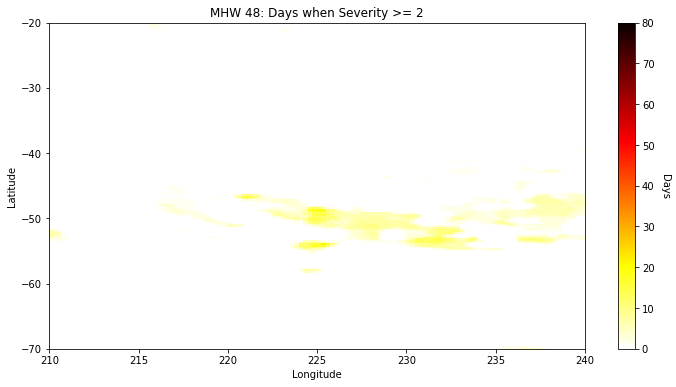

In [12]:
#PLot 3
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot()

#Plot the map

cax_gt2=count_gt2_sev_core48.plot(
    add_colorbar=False,
    vmin=0, vmax = 80,
    cmap='hot_r'
)

#Colorbar ticks
cbar = fig.colorbar(cax_gt2, extend = 'neither')

#Labels
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('Days', rotation=270)
plt.title('MHW 48: Days when Severity >= 2')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

In [28]:
#############################################################################
#Previous working to combine these using this example
#https://matplotlib.org/examples/pylab_examples/custom_cmap.html

<ipython-input-17-19edf4d1e226>:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax2 = fig.add_subplot()


NameError: name 'cbar_ax1' is not defined

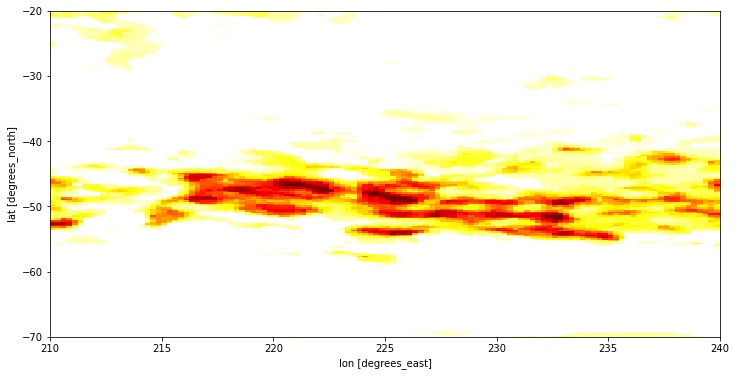

In [17]:
#Attempts to combine
fig, axes = plt.subplots(figsize=(12,6))

ax1 = fig.add_subplot()
ax2 = fig.add_subplot()

#Plot the map

cax_gt1=count_gt1_sev_core48.plot(
    add_colorbar=False,
    vmin=0, vmax = 80,
    cmap='hot_r'
)


#Colorbar ticks
cbar_ax1 = fig.colorbar(cax_gt1=cbar_ax1, extend = 'neither')

#Labels
cbar.ax1.get_yaxis().labelpad = 15
cbar.ax1.set_ylabel('Days', rotation=270)
plt.title('MHW 48: Days when Severity >= 1')
plt.ylabel("Latitude")
plt.xlabel("Longitude")
plt.show()

AttributeError: 'list' object has no attribute 'get_array'

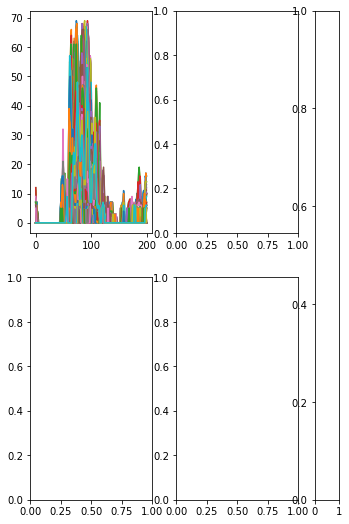

In [27]:
fig, axs = plt.subplots(2, 2, figsize=(6, 9))

#Subplot 1 
cmap = cm.get_cmap('hot_r')
                                  
cax_gt1=axs[0,0].plot(count_gt1_sev_core48)
fig.colorbar(cax_gt1, ax=axs, extend = 'neither')   


plt.show()

In [ ]:
# Working from this website
# https://stackoverflow.com/questions/23876588/matplotlib-colorbar-in-each-subplot
# This is getting close but I'm not sure why it has transformed the x and y axis, or why the plot vertical
#When usinmg the co;pr nar in this form how can i set its limits?

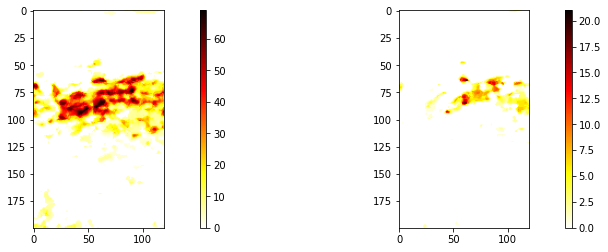

In [42]:
#Attempts to combine

cmap = cm.get_cmap('hot_r')

fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(121)
cax_gt1 = ax1.imshow(count_gt1_sev_core48, cmap)

divider = make_axes_locatable(ax1)
cax = divider.append_axes('right', size='5%', pad=0.5)
fig.colorbar(cax_gt1, cax=cax, orientation = 'vertical')   

ax2 = fig.add_subplot(122)
cax_gt2 = ax2.imshow(count_gt2_sev_core48, cmap)

divider = make_axes_locatable(ax2)
cax = divider.append_axes('right', size='5%', pad=0.5)
fig.colorbar(cax_gt2, cax=cax, orientation = 'vertical')


#lt.show()